Выполнил: Петухов Алексей группа:3821М1фикс


# Третье ДЗ. 
Сделаем то, что было по желанию, а именно:

Запустить другие классификаторы. Сравнить результаты

Как-то побороться с несбалансированностью классов (если она есть)

Исключить коррелированные переменные (объяснить зачем)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train=pd.read_csv('data/train.csv')

In [5]:
data = train
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# features: 

1. battery_power: Total energy a battery can store in one time measured in mAh
2. blue: Has bluetooth or not
3. clock_speed: speed at which microprocessor executes instructions
4. dual_sim: Has dual sim support or not
5. fc: Front Camera mega pixels
6. four_g: Has 4G or not
7. int_memory: Internal Memory in Gigabytes
8.  m_dep: Mobile Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor
11. pc: Primary Camera mega pixels
12. px_height: Pixel Resolution Height
13. px_width: Pixel Resolution Width
14. ram: Random Access Memory in Megabytes
15. sc_h: Screen Height of mobile in cm
16. sc_w: Screen Width of mobile in cm
17. talk_time: longest time that a single battery charge will last when you are
18. three_g: Has 3G or not
19. touch_screen: Has touch screen or not
20. wifi: Has wifi or not

Некоторые признаки числовые, некоторые принимают значения из ограниченного множества значений.

In [6]:
data = train
print(data.shape)
print(data.columns)

(2000, 21)
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [7]:
data.index

RangeIndex(start=0, stop=2000, step=1)

In [8]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


### 0.51 - соответствует px_width и px_height. В остальном все значения близки к 0.

Значит коррелированных переменных нет. Их выбрасывать надо, так как они несут одну и ту же информацию и поэтому достаточно использовать только один.

### Как-то побороться с несбалансированностью классов (если она есть)

In [15]:
y=data['price_range']
for i in range(4):
    print(i, 'class:', len(y[y==i]))


0 class: 500
1 class: 500
2 class: 500
3 class: 500


Значит несбалансированности классов нет

## Разделим данные

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=data.drop('price_range',axis=1)
y=data['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Запустим классификатор ближайших соседей

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [219]:
knn.score(X_test, y_test)

0.9233333333333333

### Как выбрать оптимальное k? 
Воспользуемся 'Elbow' методом

In [220]:
error_rate = []
for i in range(1, 20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Ошибка')

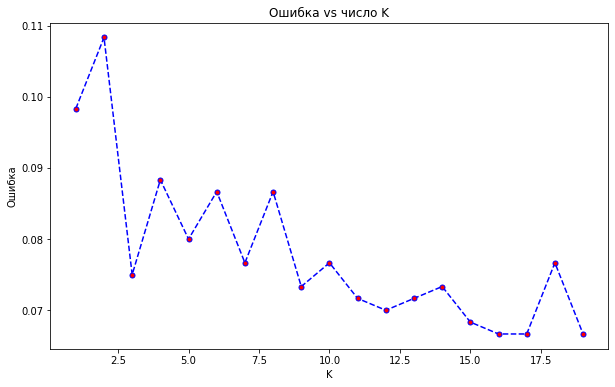

In [84]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Ошибка vs число K')
plt.xlabel('K')
plt.ylabel('Ошибка')

#### Попробовали классификатор ближайших соседей с разным числом K: от 1 до 20
Запустим с K=9

In [89]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train, y_train)
knn9.score(X_test, y_test)

0.9266666666666666

### Сделаем вывод
Судя по графику, значение ошибки варьируется от 7% до 11%. При значении числа K равным 9 получаем ошибку:

In [90]:
1 - knn9.score(X_test, y_test)

0.07333333333333336

Еще рассмотрим K = 16

In [92]:
knn16 = KNeighborsClassifier(n_neighbors=16)
knn16.fit(X_train, y_train)
1 - knn16.score(X_test, y_test)

0.06666666666666665

Получаем ошибку меньше, чем с K=9. Теперь ошибка составляет около 6.7%

## Сравним результаты с другим классификатором - RandomForestClassifier.

In [116]:
from sklearn.ensemble import RandomForestClassifier
errors = []
for est in range(10, 200, 20):
    rfc = RandomForestClassifier(n_estimators=est)
    rfc.fit(X_train, y_train)
    errors.append(rfc.score(X_test, y_test))

Text(0, 0.5, 'Score')

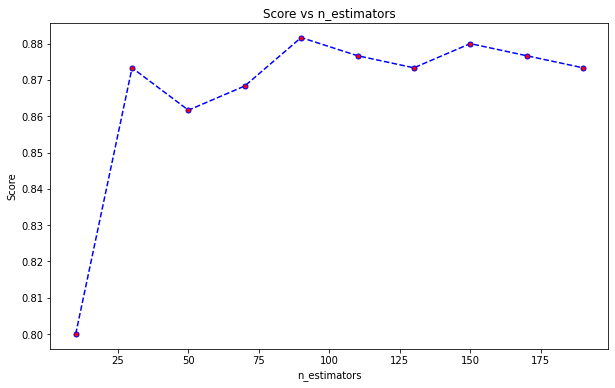

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 20), errors, 
         color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
plt.title('Score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Score')

In [180]:
best_n_estimators = 90
rfc = RandomForestClassifier(n_estimators=best_n_estimators)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.87


Получили accuracy 87%, т.е. ошибку 13%

## Теперь запустим другие классификаторы

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
errors = []
for est in range(10, 200, 20):
    boost = GradientBoostingClassifier(n_estimators=est)
    boost.fit(X_train, y_train)
    errors.append(boost.score(X_test, y_test))

Text(0, 0.5, 'Score')

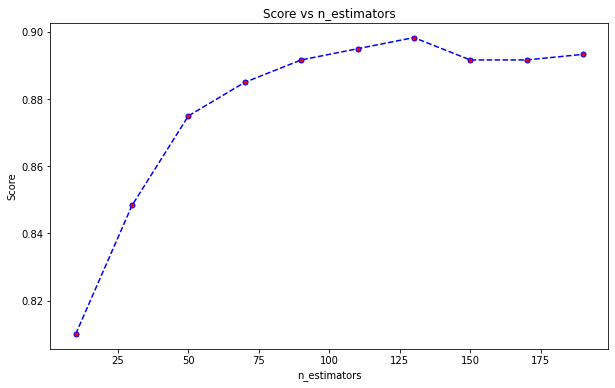

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 20), errors, 
         color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
plt.title('Score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Score')

In [44]:
best_n_estimators = 130
boost = GradientBoostingClassifier(n_estimators=best_n_estimators)
boost.fit(X_train, y_train)
print(boost.score(X_test, y_test))

0.9


Получили 90% точность (accuracy). Т.е. ошибка составляет 10%

In [51]:
from sklearn.tree import DecisionTreeClassifier

errors = []
errors_entr = []
for depth in range(1, 16, 2):
    dtree = DecisionTreeClassifier(max_depth=depth, criterion='gini')
    dtree.fit(X_train, y_train)
    dtree_entr = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    dtree_entr.fit(X_train, y_train)
    errors.append(dtree.score(X_test, y_test))
    errors_entr.append(dtree_entr.score(X_test, y_test))

Text(0, 0.5, 'Score')

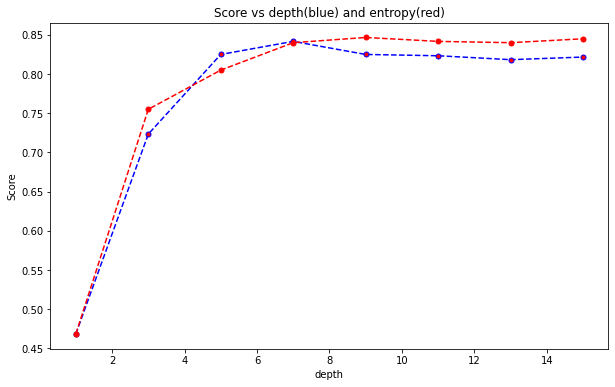

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16, 2), errors, 
         color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
plt.plot(range(1, 16, 2), errors_entr, 
         color='red', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
plt.title('Score vs depth(blue) and entropy(red)')
plt.xlabel('depth')
plt.ylabel('Score')

In [97]:
dtree = DecisionTreeClassifier(max_depth=9, criterion='entropy')
dtree.fit(X_train, y_train)
print(dtree.score(X_test, y_test))

0.8516666666666667


Получили 85% точность (accuracy). Т.е. ошибка составляет 15%

ram px_height battery_power


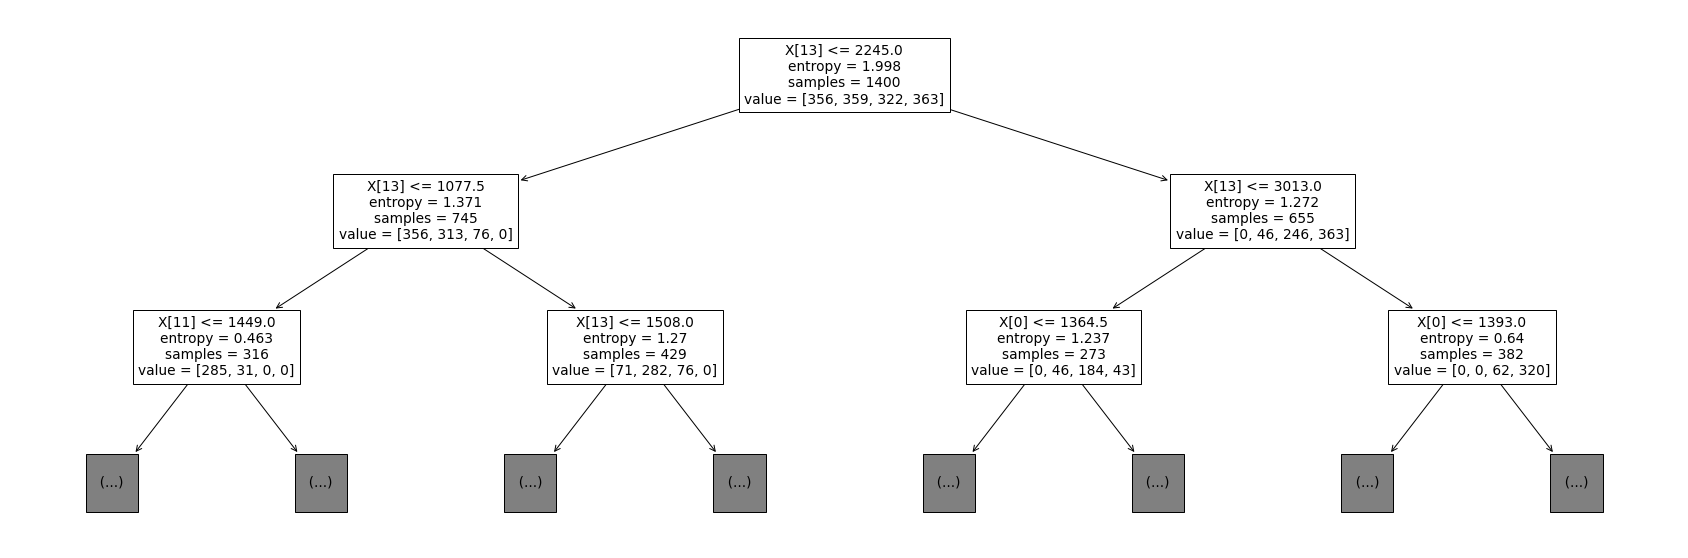

In [114]:
from sklearn import tree

plt.figure(figsize=(30, 10))
tree.plot_tree(dtree, max_depth=2)

features = X_train.columns
print(features[13], features[11], features[0])

# Выводы
Мы рассмотрели задачу классификации. Были применены различные классификаторы такие как KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier и DecisionTreeClassifier. Получили следующие результаты accuracy этих классификаторов:
kNN: 93% (k = 9, 16)
RandomForest: 87% (n_estimators = 90)
GradientBoosting: 90% (n_estimators = 130)
DecisionTree: 85% (max_depth = 9, criterion = 'entropy')

Таким образом получилось, что наилучшие результаты показали kNN и GradientBoosting.